# Practica 9

In [2]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    matplotlib-base-3.2.1      |   py37h911224e_0         7.1 MB  conda-forge
    mlxtend-0.17.2             |             py_0         1.2 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.4 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.1-py37h911224e_0
  mlxtend            conda-forge/noarch::mlxtend-0.17.2-py_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The follow



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
path='car.data'
df=pd.read_csv(path)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


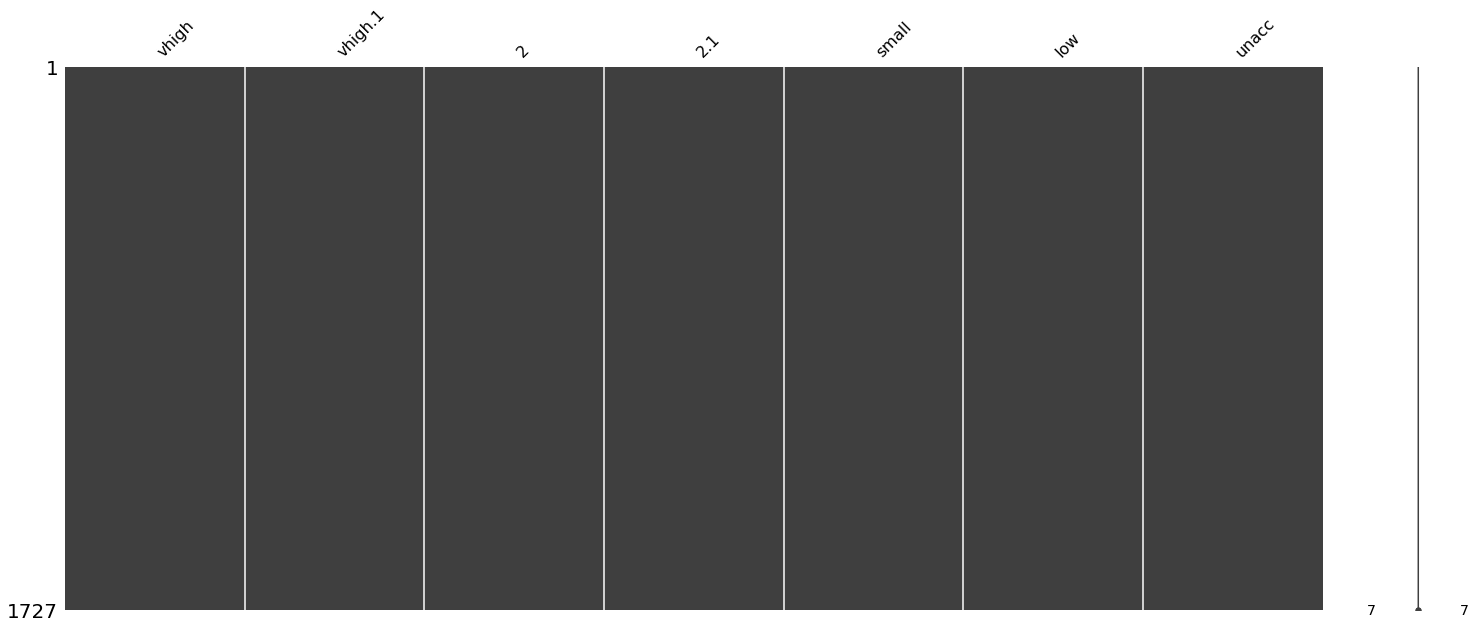

In [4]:
msno.matrix(df)

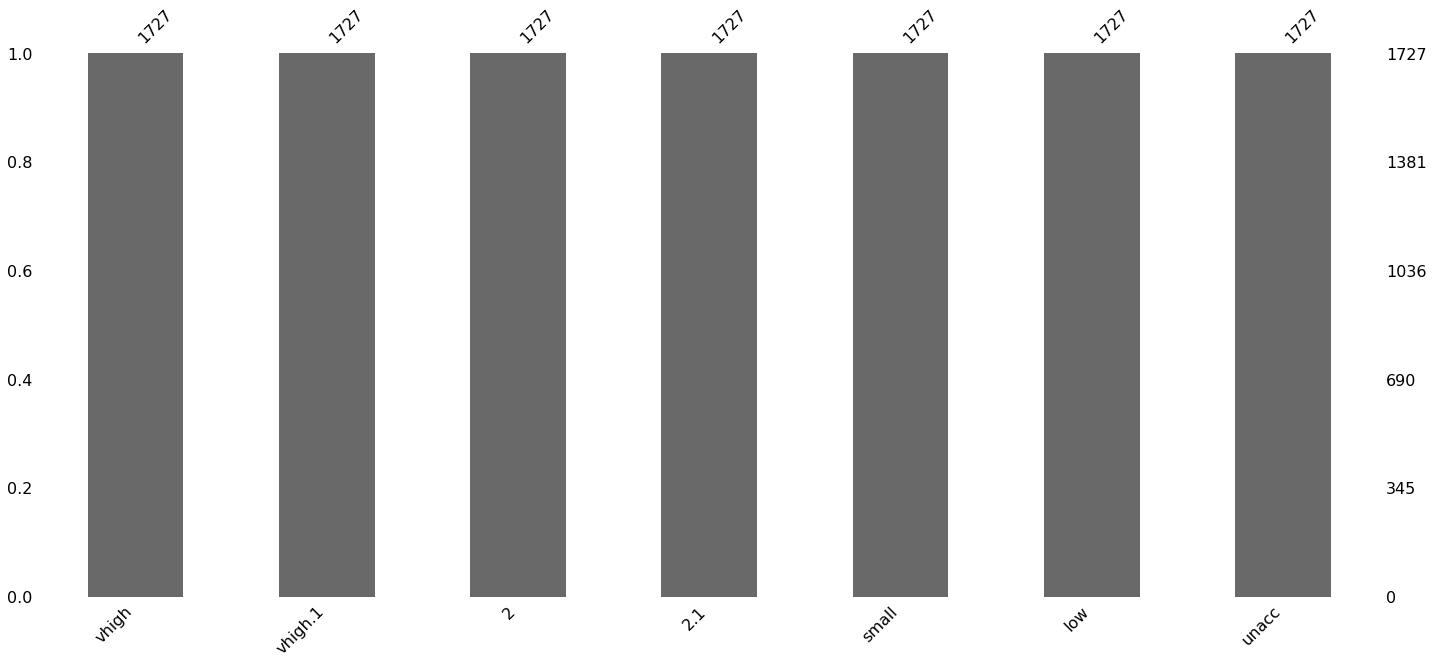

In [5]:
msno.bar(df)

In [9]:
items = (df['vhigh'].unique())
items

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [11]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,low,high,vhigh,med
0,0,0,1,1
1,0,1,1,0
2,1,0,1,1
3,0,0,1,1
4,0,1,1,1


# Apriori

In [12]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 12 combinations | Sampling itemset size 3


,support,itemsets
0,0.624783,(low)
1,0.625362,(high)
2,0.437174,(vhigh)
3,0.750434,(med)
4,0.333526,"(low, high)"


In [13]:
freq_items.itemsets.unique()


array([frozenset({'low'}), frozenset({'high'}), frozenset({'vhigh'}),
       frozenset({'med'}), frozenset({'low', 'high'}),
       frozenset({'low', 'vhigh'}), frozenset({'low', 'med'}),
       frozenset({'vhigh', 'high'}), frozenset({'med', 'high'}),
       frozenset({'vhigh', 'med'})], dtype=object)

In [14]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(low),(med),0.624783,0.750434,0.430805,0.689527,0.918838,-0.038054,0.803825
1,(high),(med),0.625362,0.750434,0.430805,0.688889,0.917987,-0.038488,0.802176
2,(vhigh),(med),0.437174,0.750434,0.298784,0.683444,0.910731,-0.029287,0.788377
